In [297]:
from sqlite3 import connect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style("ticks",{'axes.grid' : True})

In [293]:
# Import database
cnx = connect('/home/davo/Documents/GCBM.Animation/sample_data/sample_1/output_files/compiled_gcbm_output.db')

# Table list
cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [i[0] for i in cursor.fetchall()]
print(tables)

['v_age_indicators', 'v_disturbance_indicators', 'v_error_indicators', 'v_flux_indicator_aggregates', 'v_flux_indicator_aggregates_density', 'v_flux_indicators', 'v_flux_indicators_density', 'v_pool_indicators', 'v_stock_change_indicators', 'v_stock_change_indicators_density', 'v_total_disturbed_areas']


In [294]:
# reading the tables to use in python
dataframes = []
for i in tables:
    sql_command = f'SELECT * FROM {str(i)}'
    df = pd.read_sql(sql_command, cnx)
    df.name = i
    dataframes.append(df)

In [90]:
# Reading each table (11 tables)
# def inspect_dataframe(dataframes, i):
#     print('========================================================================================')
#     print(f'Dataframe:\t{dataframes[i].name}')
#     print('========================================================================================')
#     print(dataframes[i].info())
#     print()
#     print(dataframes[i].describe().round(1))
#     print('========================================================================================')

# Dataframe 0 - `v_age_indicators`

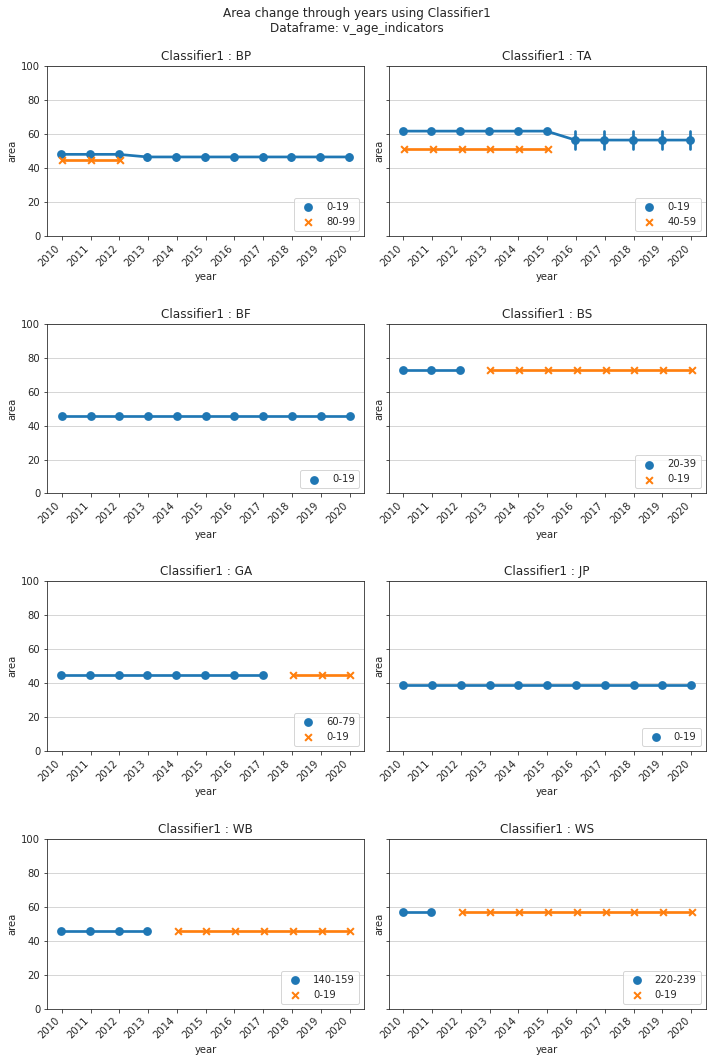

In [298]:
# dataframe 1
df = dataframes[0].copy()
df.drop(columns=['Classifier2', 'unfccc_land_class'], inplace=True)

classifier = df.Classifier1.value_counts().index.to_list()
nrows = len(classifier)//2

fig, axs = plt.subplots(nrows,2, figsize=(10,15), facecolor='w', edgecolor='k', sharey=True)

for ax, i in zip(axs.ravel(), classifier):
    temp = df.loc[df.Classifier1 == i,].copy()
    sns.pointplot(x='year', y='area', hue='age_range', data=temp, 
                  dodge = True,markers=["o", "x"], ax=ax)
    ax.legend(loc=4)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nClassifier1 : {str(i)}')
    ax.set_ylim([0,100])

fig.suptitle(f'Area change through years using Classifier1\nDataframe: {dataframes[0].name}')
plt.tight_layout()
plt.show()

In [241]:
# Easiest (but not complete option)
# g = sns.catplot(x='year', y='area', hue='age_range', data=df,
#                 col="Classifier1", kind="point",
                # # dodge=True,col_wrap=2, binrange=(0, 100),
                # height=4, aspect=1.2);

# Dataframe 1 - `v_disturbance_indicators`

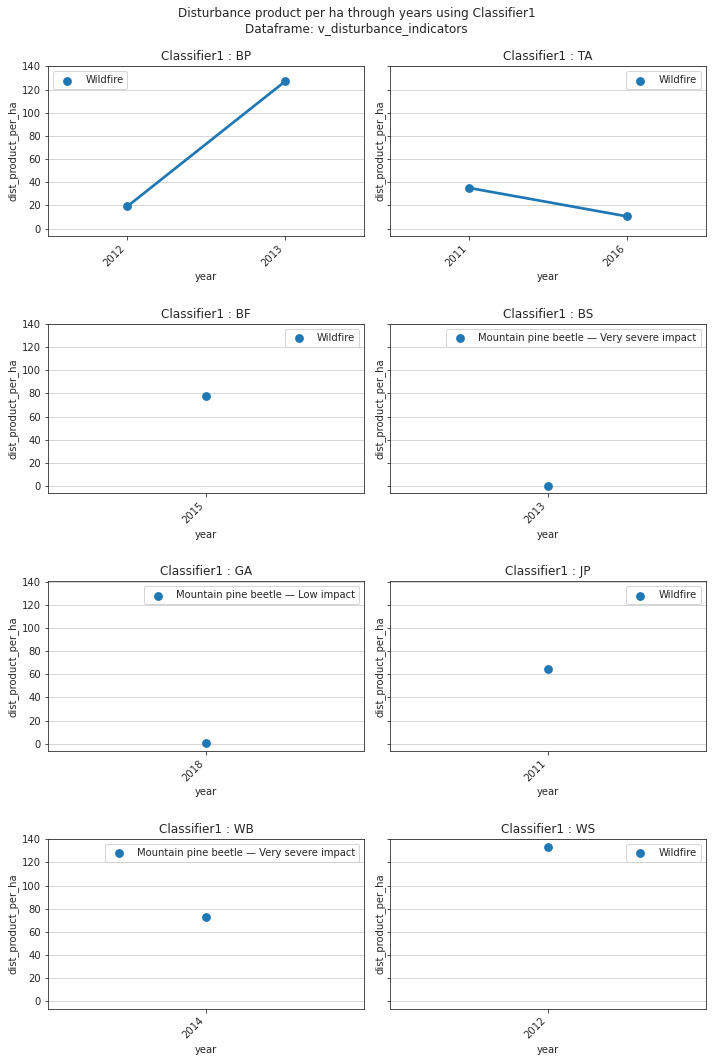

In [300]:
# Getting on dataframe 1
df = dataframes[1].copy()
df.drop(columns=['Classifier2', 'unfccc_land_class', 'disturbance_code'], inplace=True)

classifier = df.Classifier1.value_counts().index.to_list()
nrows = len(classifier)//2

fig, axs = plt.subplots(nrows,2, figsize=(10,15), facecolor='w', edgecolor='k', sharey=True)

for ax, i in zip(axs.ravel(), classifier):
    temp = df.loc[df.Classifier1 == i,].copy()
    sns.pointplot(x='year', y='dist_product_per_ha', hue='disturbance_type', data=temp, 
                  dodge = True,markers=["o", "x"], ax=ax)
    ax.legend(loc=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nClassifier1 : {str(i)}')

fig.suptitle(f'Disturbance product per ha through years using Classifier1\nDataframe: {dataframes[1].name}')
plt.tight_layout()
plt.show()

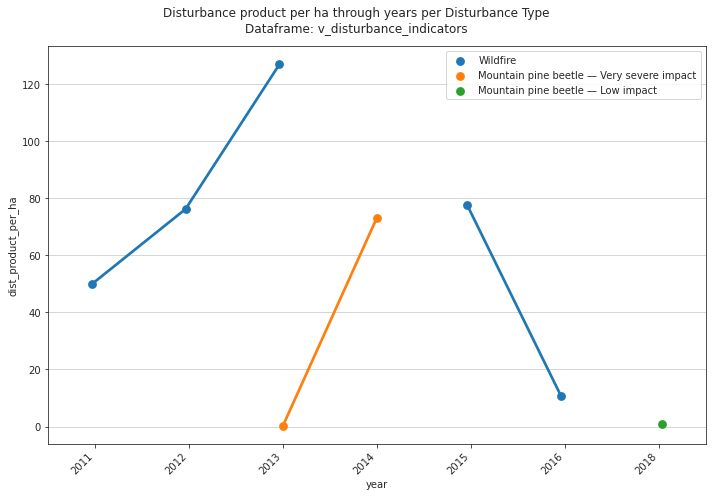

In [302]:
fig = plt.figure(figsize=(10, 7))
g = sns.pointplot(x='year', y='dist_product_per_ha', hue='disturbance_type', size = 'Classifier1' , data=df, dodge = True, ci=None)
g.legend(loc=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f'Disturbance product per ha through years per Disturbance Type\nDataframe: {dataframes[1].name}')
plt.tight_layout()
plt.show()

# Dataframe 2 - `v_error_indicators`

In [307]:
# Getting on dataframe 2
df = dataframes[2].copy() # empty

# Dataframe 3 - `'v_flux_indicator_aggregates'`

In [370]:
# Getting on dataframe 3
df = dataframes[3].copy()
df.drop(columns=['flux_indicator_collection_id', 'Classifier2', 'unfccc_land_class'], inplace=True)

In [371]:
# List of indicators
indicators = [('Carbon Emissions',['All Emissions', 'CH4 Emissions', 'CO Emissions',  'CO2 Emissions']),
              ('DOM Emissions', ['DOM Emissions', 'DOM Emissions - Annual Process', 'DOM Emissions - Disturbance', 'DOM Removals', 'Disturbance Emissions and DOM Annual Process Emissions']),
              ('Litterfall', ['Annual Litterfall', 'Litter to Air', 'Litterfall - Annual Process', 'Litterfall - Combined']),
              ('Biomass', ['Biomass Emissions',  'Biomass Removals', 'BiomassToSoil', 'Soil to Air']),
              ('Mortality', ['Annual Mortality', 'Mortality - Annual Process', 'Mortality - Combined']),
              ('Ecosystem', ['Deadwood to Air',  'Decomposition Releases',  'Ecosystem Removals',  'Gross Growth'])
             ]

nrows = len(indicators)

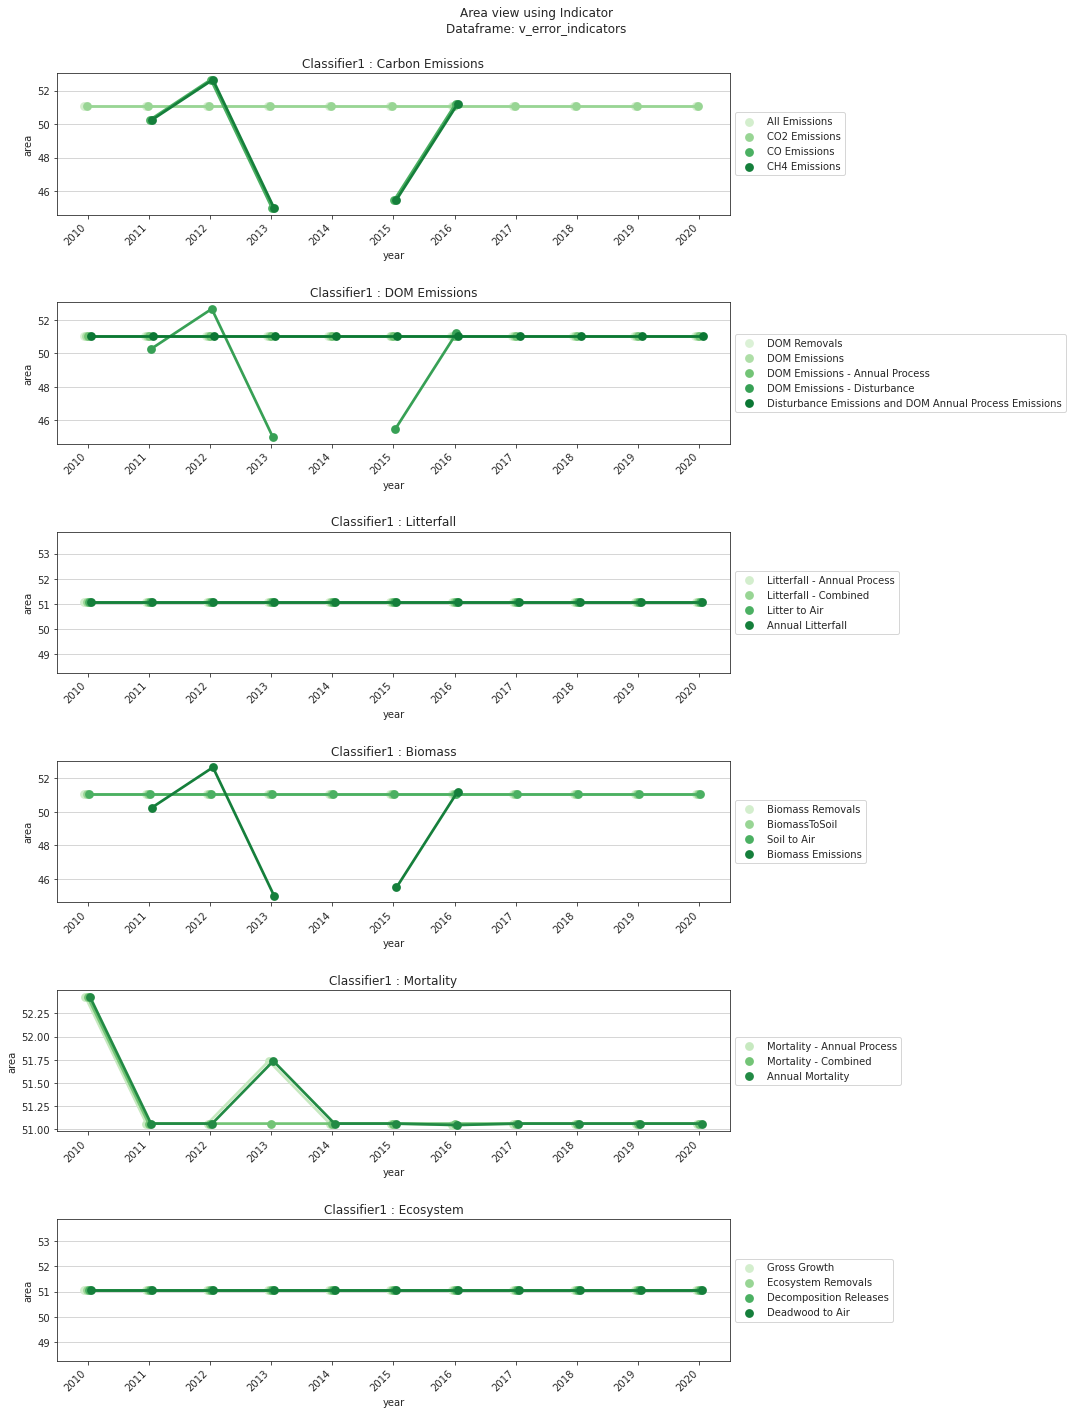

In [374]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='area', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Greens')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nClassifier1 : {str(name)}')

fig.suptitle(f'Area view using Indicator\nDataframe: {dataframes[2].name}\n')
plt.tight_layout()
plt.show()

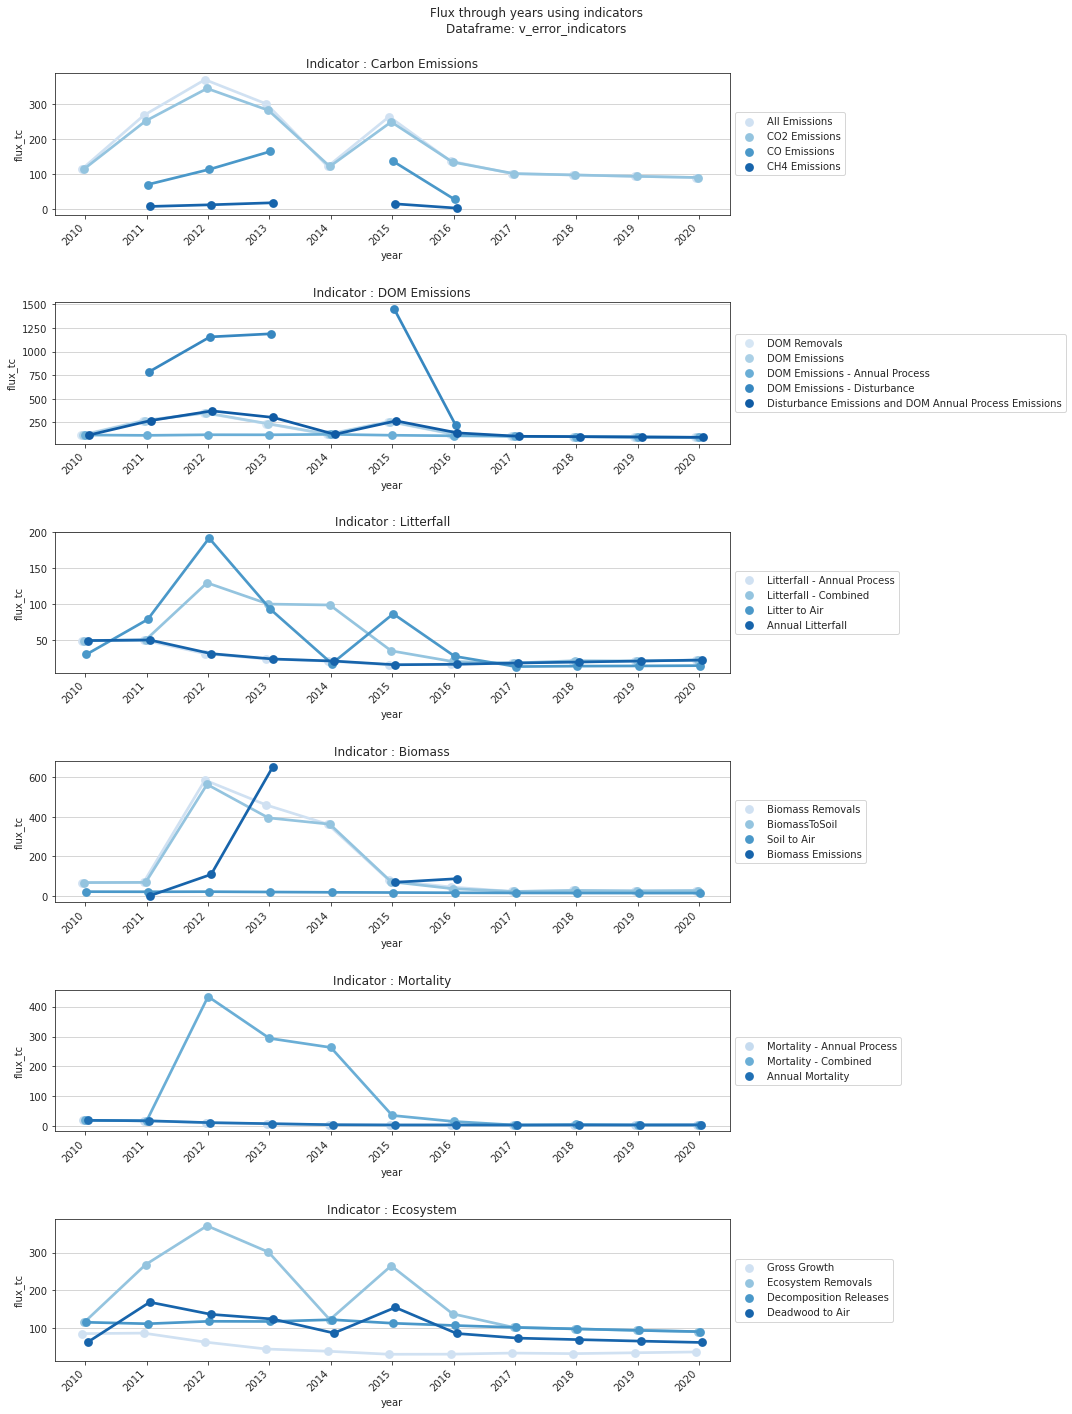

In [375]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='flux_tc', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Blues')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Flux through years using indicators\nDataframe: {dataframes[2].name}\n')
plt.tight_layout()
plt.show()

# Dataframe 4 - `'v_flux_indicator_aggregates_density'`

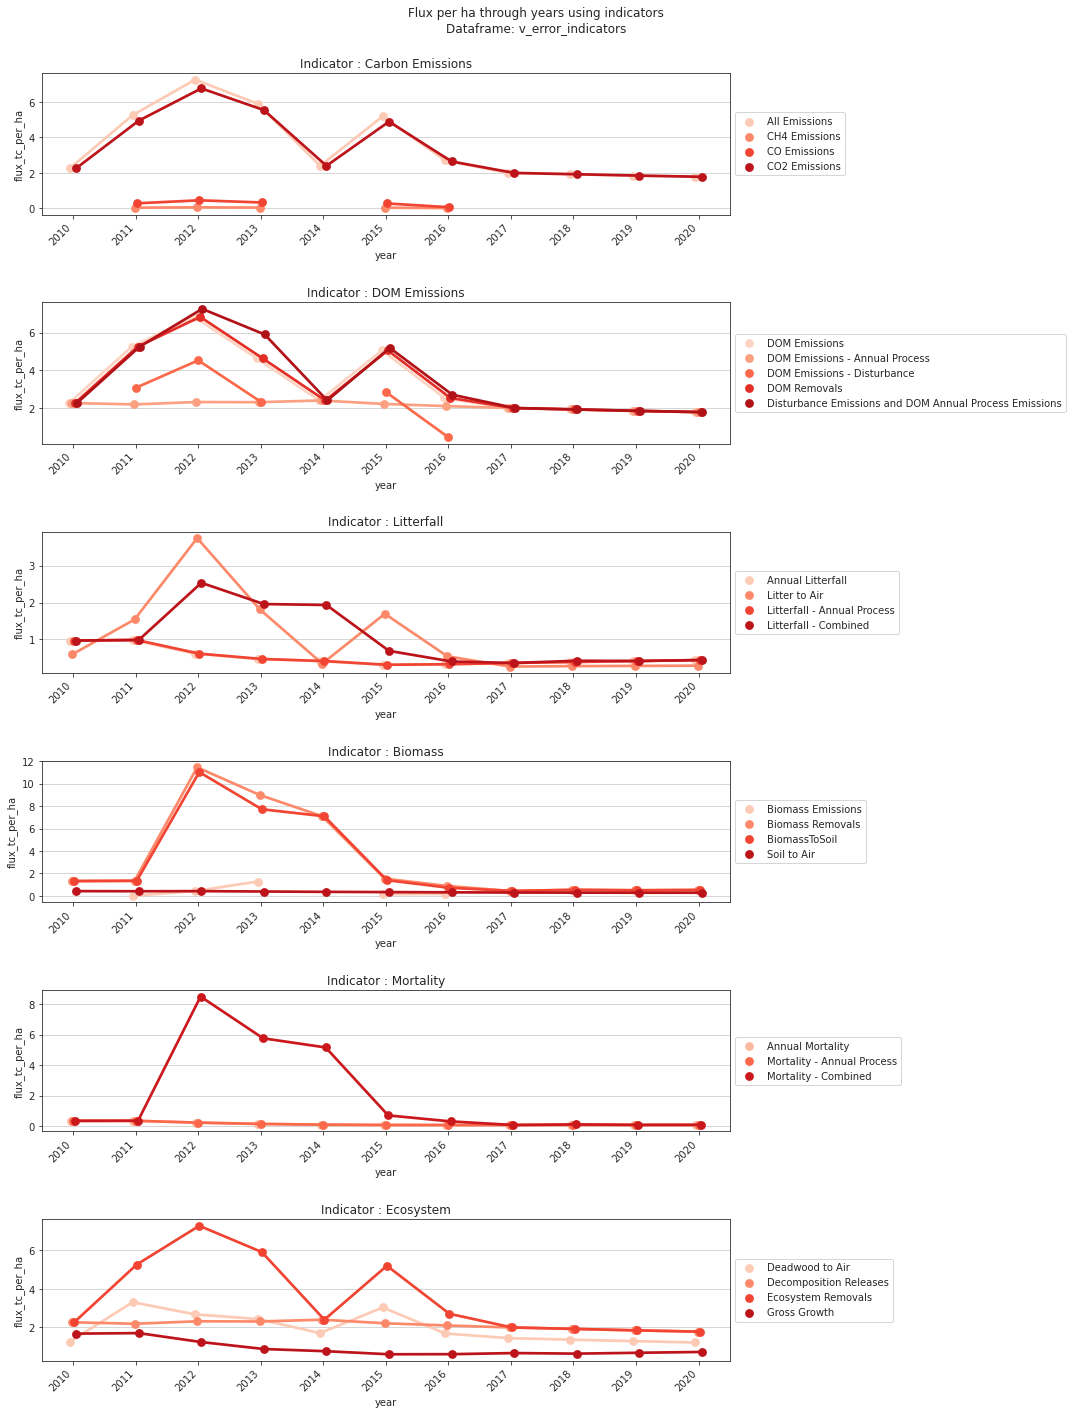

In [379]:
df = dataframes[4].copy()

fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='flux_tc_per_ha', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Reds')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Flux per ha through years using indicators\nDataframe: {dataframes[2].name}\n')
plt.tight_layout()
plt.show()

# Dataframe 5 - `'v_flux_indicators'`

In [412]:
df = dataframes[5].copy()
df.drop(columns=['flux_indicator_id', 'Classifier2', 'unfccc_land_class', 'disturbance_code'], inplace=True)

In [406]:
indicators = [('BIO', ['BioCH4Emission', 'BioCO2Emission', 'BioCOEmission', 'BiomassToSoil']),
              ('DOM', ['DOMCH4Emission', 'DOMCH4Emission - Disturbance', 'DOMCO2Emission', 'DOMCO2Emission - Annual Process', 'DOMCO2Emission - Disturbance', 'DOMCOEmission', 'DOMCOEmission - Disturbance']),
              ('Carbon', ['CH4Production', 'CO2Production', 'COProduction']),
              ('Litterfall', ['CoarseLitterInput', 'Litterfall - Annual Process', 'Litterfall - Combined', 'FineLitterInput', 'FolLitterInput', 'MerchLitterInput', 'OthLitterInput']),
              ('AG-BG', ['FastAGToAir', 'FastBGToAir', 'GrossGrowth_AG', 'GrossGrowth_BG']),
              ('Mortality', ['Mortality - Annual Process', 'Mortality - Combined']),
              ('Air', ['FineToAir',  'FolToAir',  'HWBranchSnagToAir', 'HWStemSnagToAir', 'MediumToAir', 'OthToAir', 'SWBranchSnagToAir', 'SWStemSnagToAir', 'SlowAGToAir', 'SlowBGToAir', 'VFastAGToAir', 'VFastBGToAir'])
             ]

nrows = len(indicators)

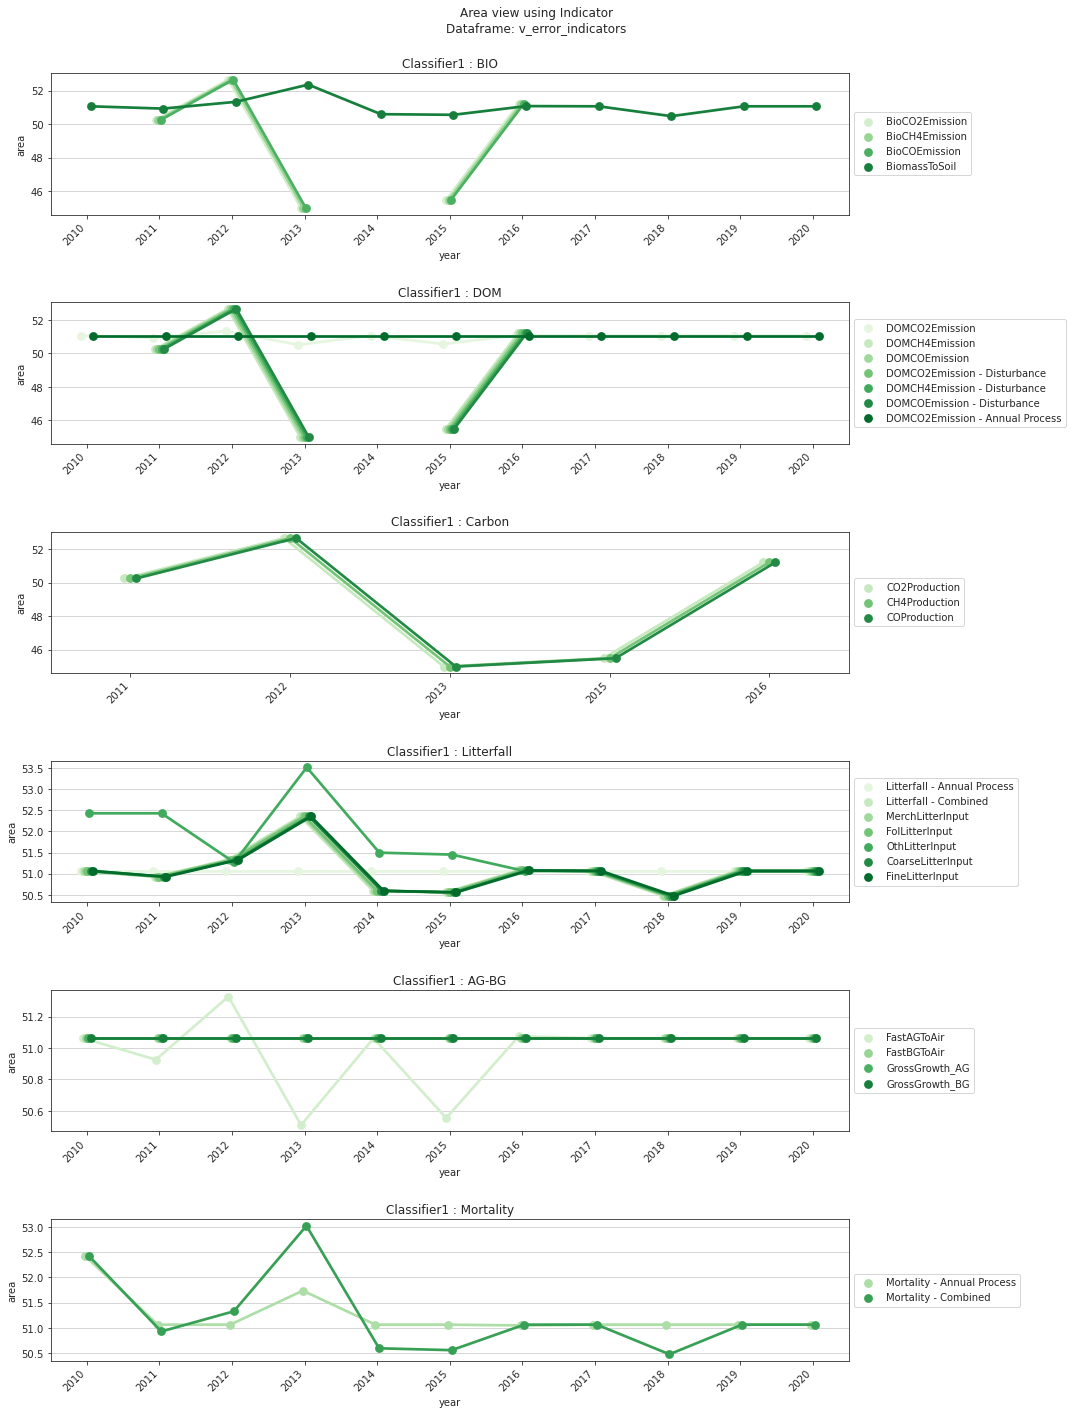

In [402]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='area', hue='indicator', size = 'disturbance_type', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Greens')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nClassifier1 : {str(name)}')

fig.suptitle(f'Area view using Flux Indicators\nDataframe: {dataframes[5].name}\n')
plt.tight_layout()
plt.show()

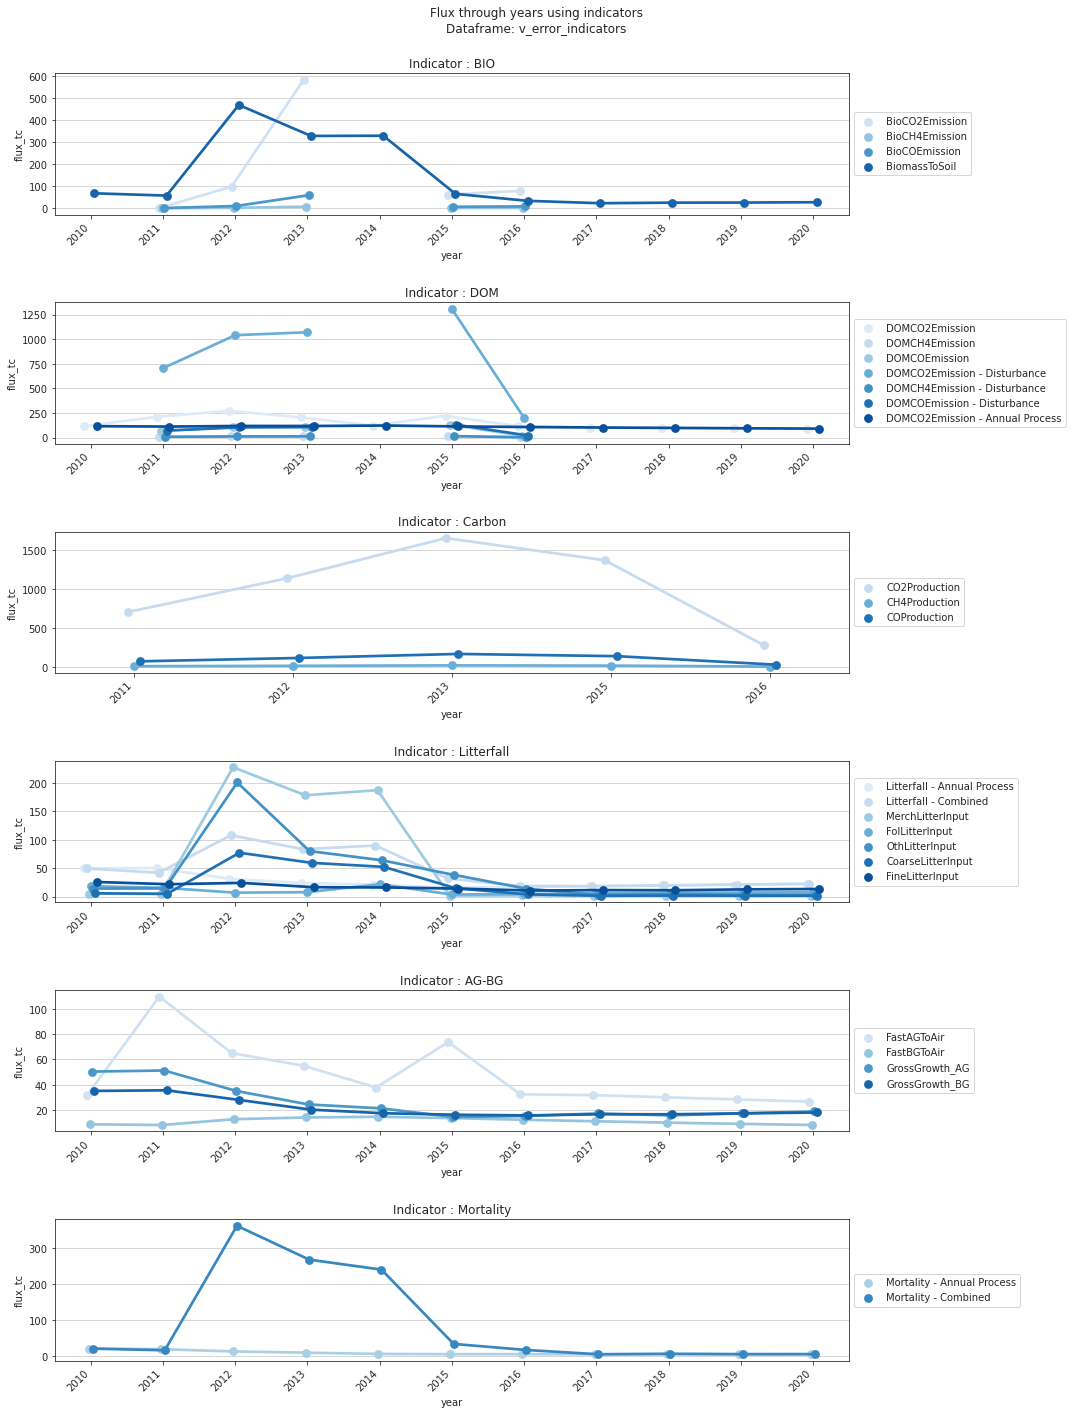

In [403]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='flux_tc', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Blues')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Flux through years using Flux indicators\nDataframe: {dataframes[5].name}\n')
plt.tight_layout()
plt.show()

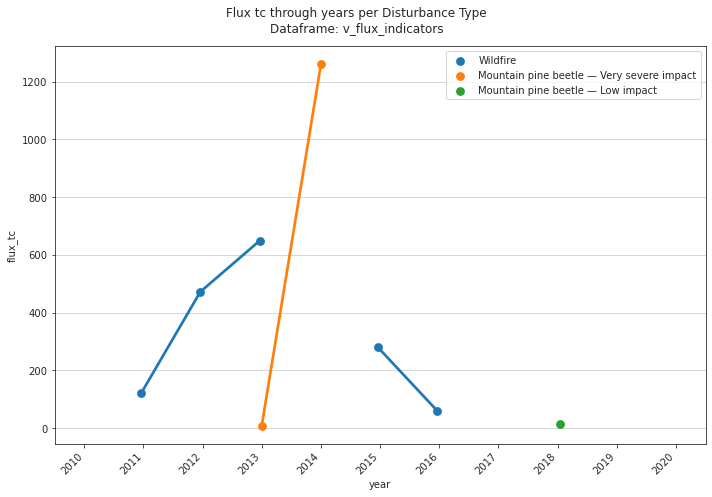

In [409]:
fig = plt.figure(figsize=(10, 7))
g = sns.pointplot(x='year', y='flux_tc', hue='disturbance_type', size = 'age_range' , data=df, dodge = True, ci=None)
g.legend(loc=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f'Flux tc through years per Disturbance Type\nDataframe: {dataframes[5].name}')
plt.tight_layout()
plt.show()

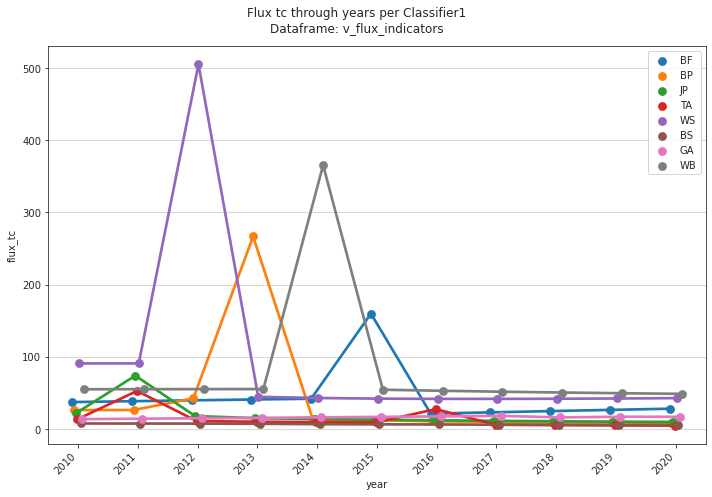

In [413]:
fig = plt.figure(figsize=(10, 7))
g = sns.pointplot(x='year', y='flux_tc', hue='Classifier1', size = 'age_range' , data=df, dodge = True, ci=None)
g.legend(loc=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f'Flux tc through years per Classifier1\nDataframe: {dataframes[5].name}')
plt.tight_layout()
plt.show()

# Dataframe 6 - `'v_flux_indicators_density'`

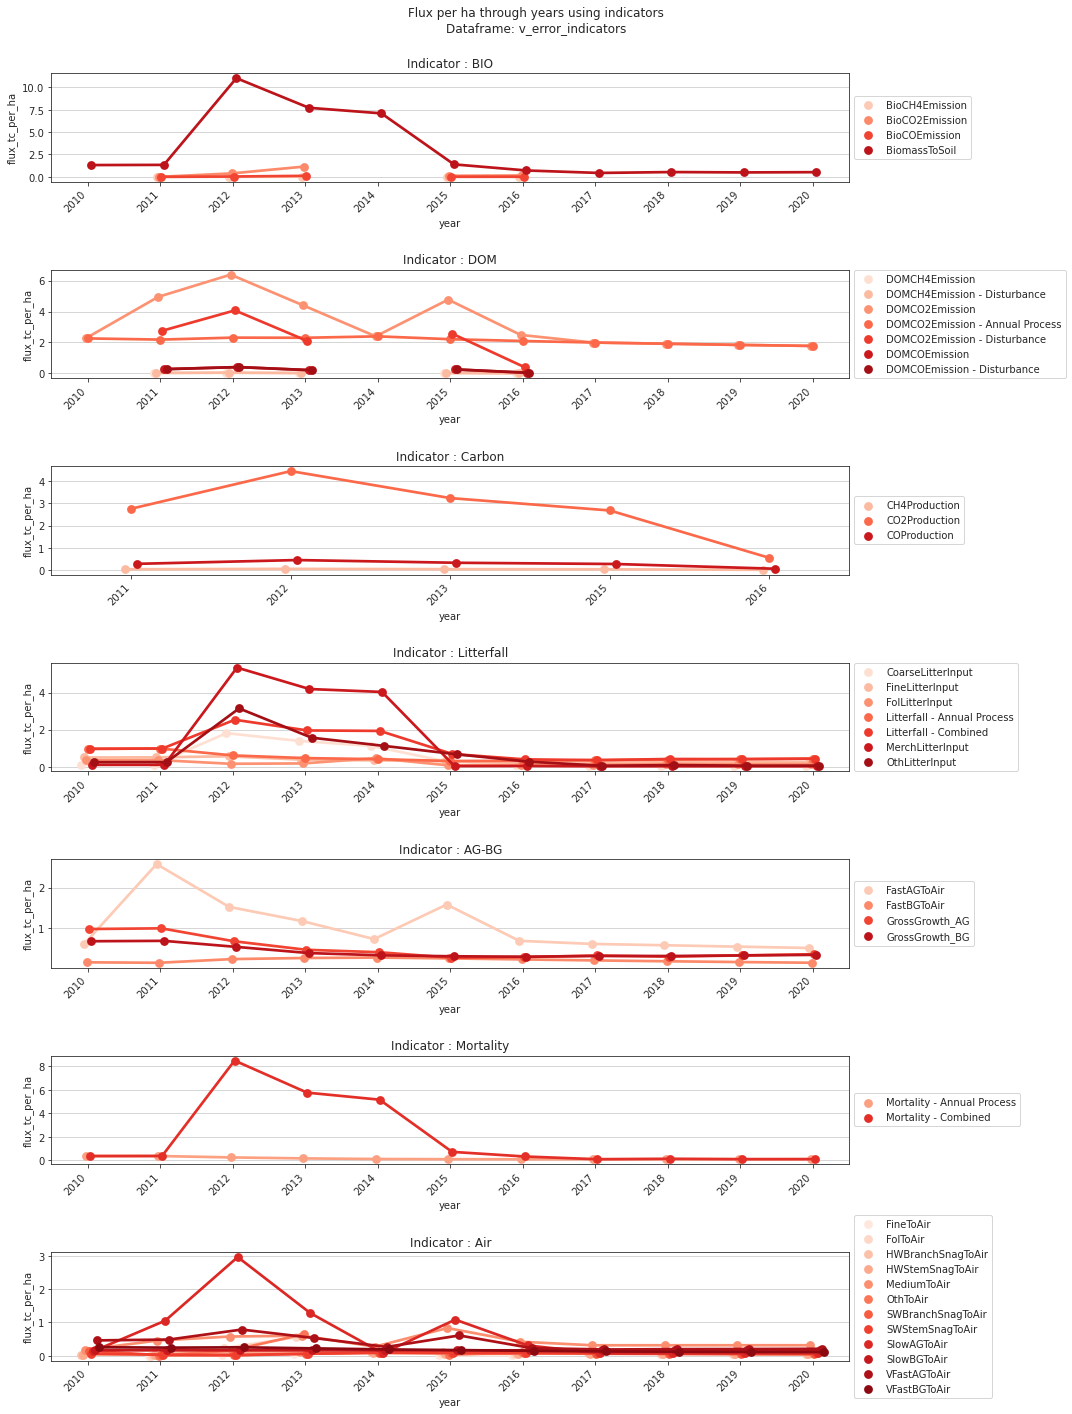

In [415]:
df = dataframes[6].copy()

fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='flux_tc_per_ha', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Reds')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Flux per ha through years using indicators\nDataframe: {dataframes[2].name}\n')
plt.tight_layout()
plt.show()

# Dataframe 7 - `'v_pool_indicators'`

In [424]:
df = dataframes[7].copy()
df.drop(columns=['indicator_id', 'Classifier2', 'unfccc_land_class'], inplace=True)

In [425]:
indicators = df.indicator.value_counts().sort_index().index.to_list()
nrows = len(indicators)

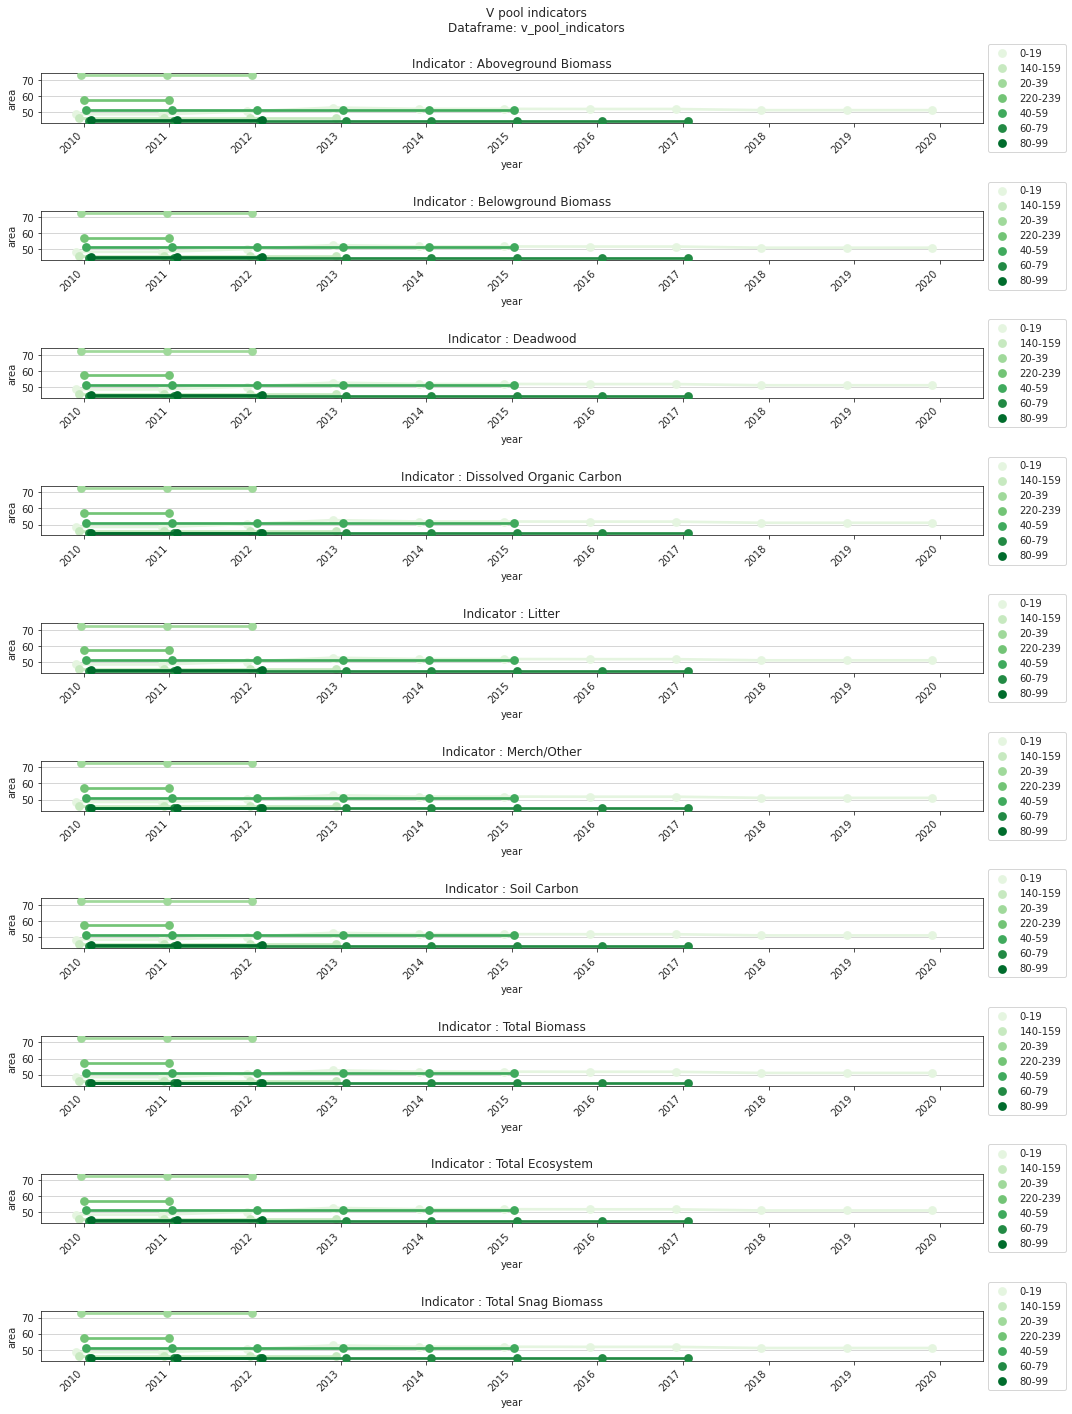

In [438]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    temp = df.loc[df['indicator'] == i,].copy()
    sns.pointplot(x='year', y='area', hue='age_range', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Greens')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(i)}')

fig.suptitle(f'Area using V pool indicators\nDataframe: {dataframes[7].name}\n')
plt.tight_layout()
plt.show()

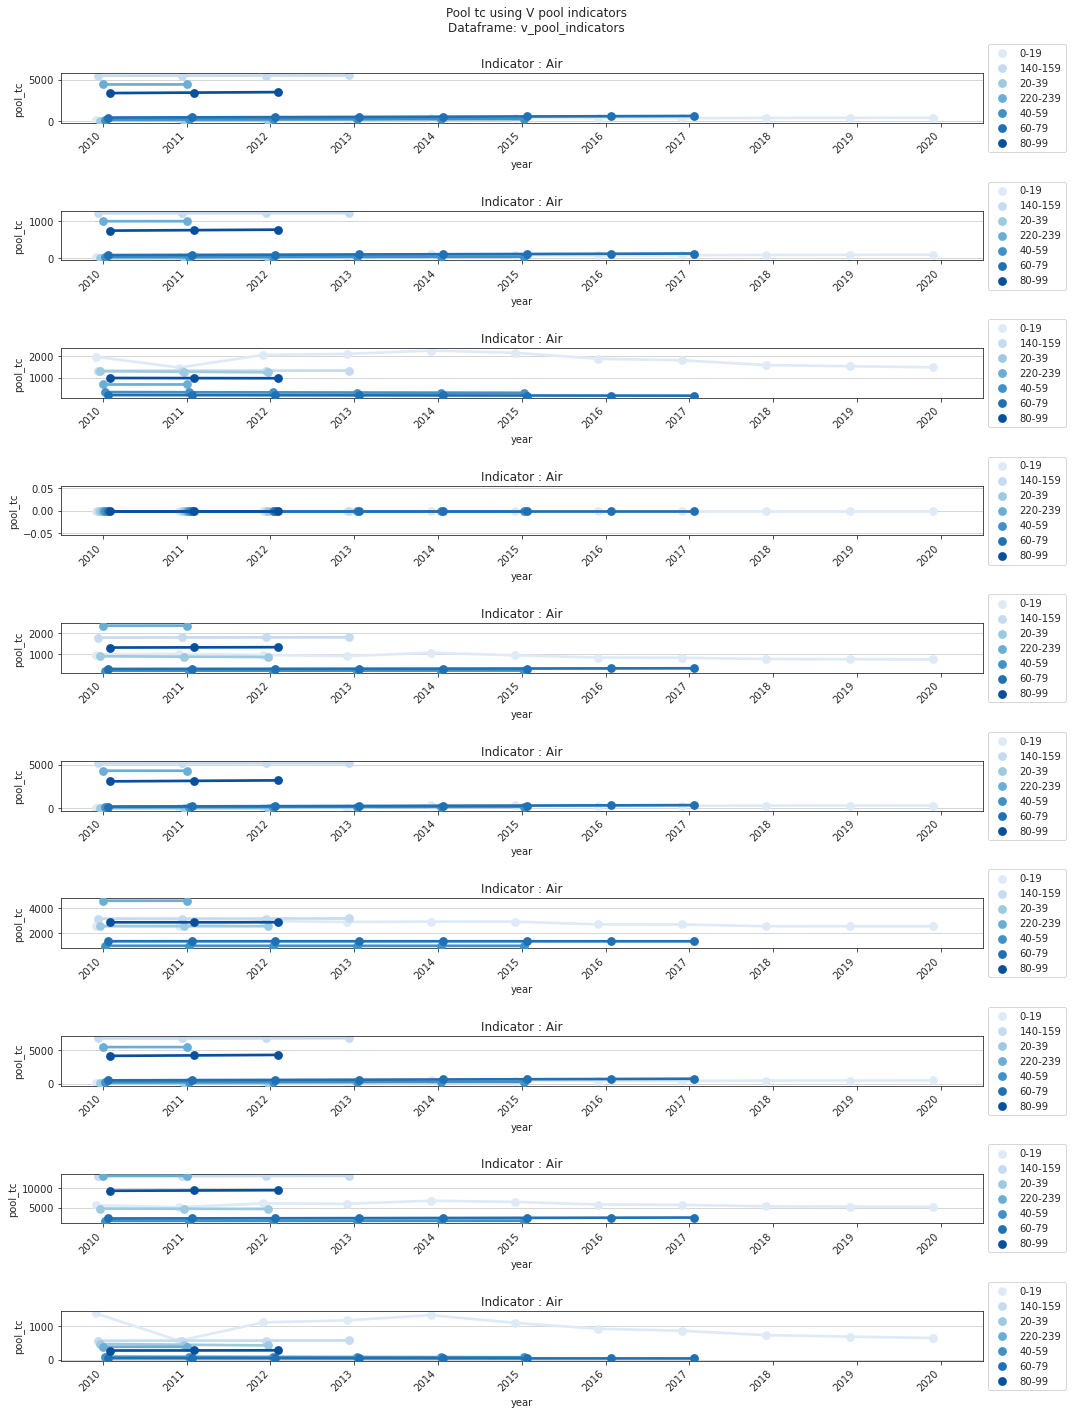

In [440]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    temp = df.loc[df['indicator']==i,].copy()
    sns.pointplot(x='year', y='pool_tc', hue='age_range', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Blues')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Pool tc using V pool indicators\nDataframe: {dataframes[7].name}\n')
plt.tight_layout()
plt.show()

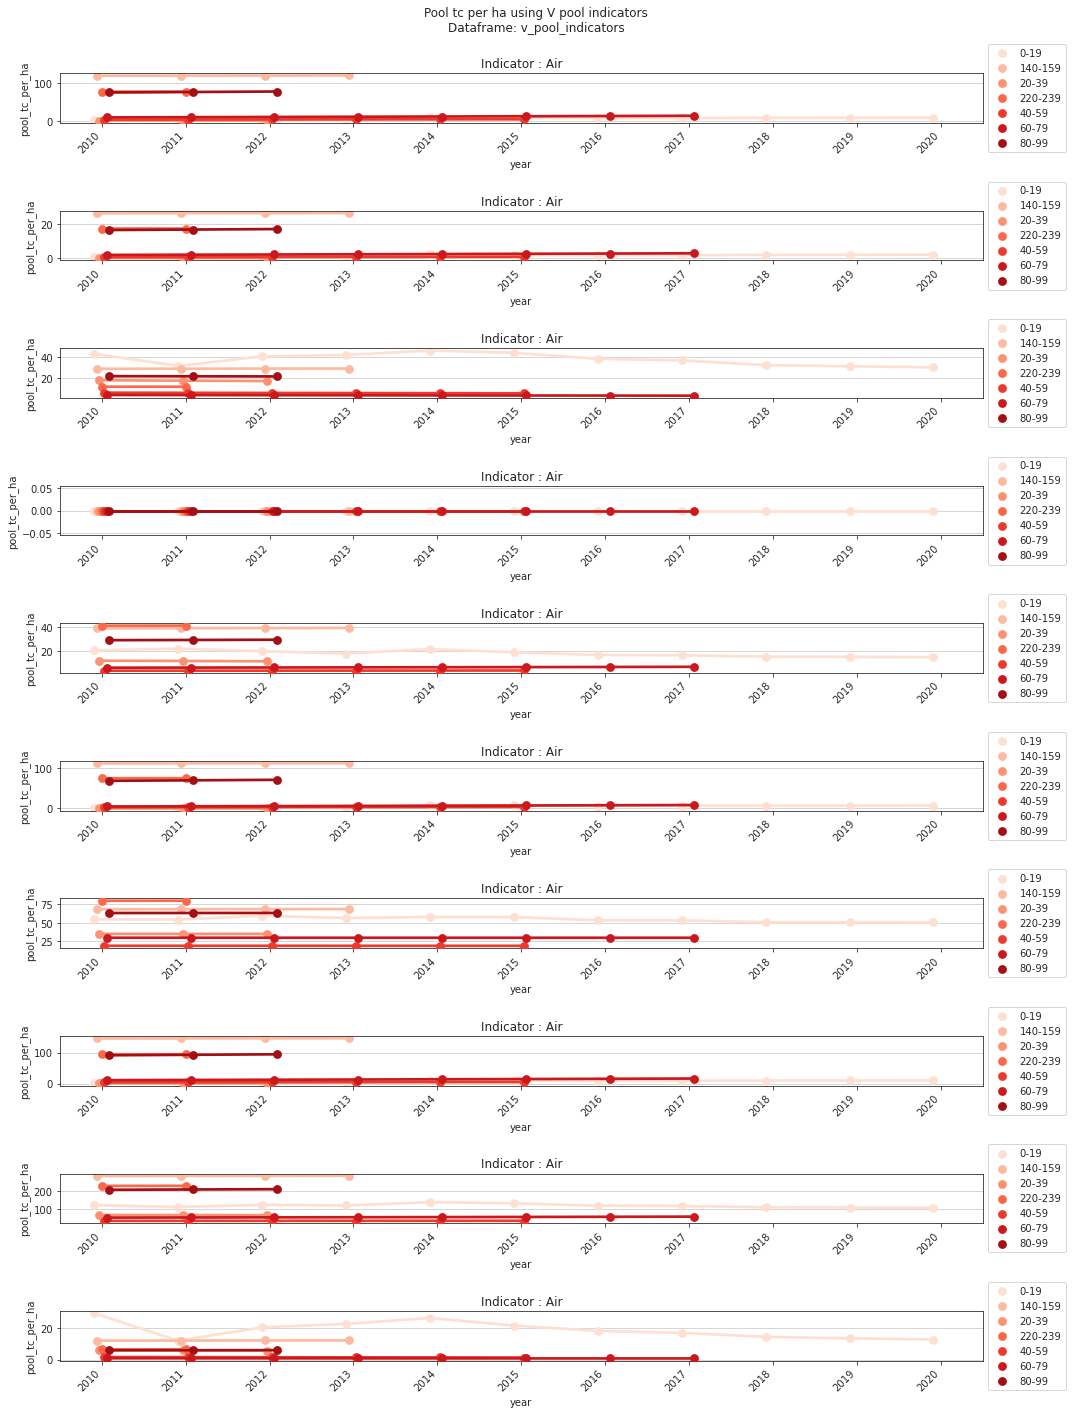

In [442]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    temp = df.loc[df['indicator']==i,].copy()
    sns.pointplot(x='year', y='pool_tc_per_ha', hue='age_range', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Reds')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Pool tc per ha using V pool indicators\nDataframe: {dataframes[7].name}\n')
plt.tight_layout()
plt.show()

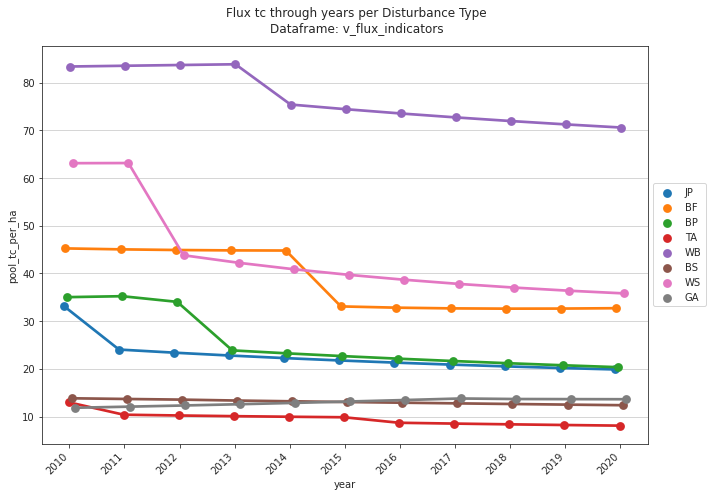

In [446]:
fig = plt.figure(figsize=(10, 7))
g = sns.pointplot(x='year', y='pool_tc_per_ha', hue='Classifier1', data=df, dodge = True, ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f'Flux tc through years per Disturbance Type\nDataframe: {dataframes[5].name}')
plt.tight_layout()
plt.show()

# Dataframe 8 - `'v_stock_change_indicators'`

In [449]:
df = dataframes[8].copy()
df.drop(columns=['Classifier2', 'unfccc_land_class'], inplace=True)

In [459]:
# indicator = df.indicator.value_counts().sort_index().index.to_list()
indicators = [
    ('Annual values', ['Annual Litterfall', 'Annual Mortality']),
    ('Total values', ['Total Biomass Emissions', 'Total CH4 Emissions', 'Total CO Emissions',  'Total CO2 Emissions', 'Total DOM Emissions', 'Total Detrital Transfers',  'Total Emissions',  'Total Litterfall',  'Total Mortality']),
    ('Ecosystem', ['Deadwood to Atmosphere', 'Decomposition Releases','Soil to Atmosphere', 'Disturbance Losses']),
    ('Net Products', [ 'NBP', 'NEP', 'NPP', 'Rh',]),
    ('Delta', ['Delta Total Biomass', 'Delta Total DOM', 'Delta Total Ecosystem'])
]

nrows = len(indicators)

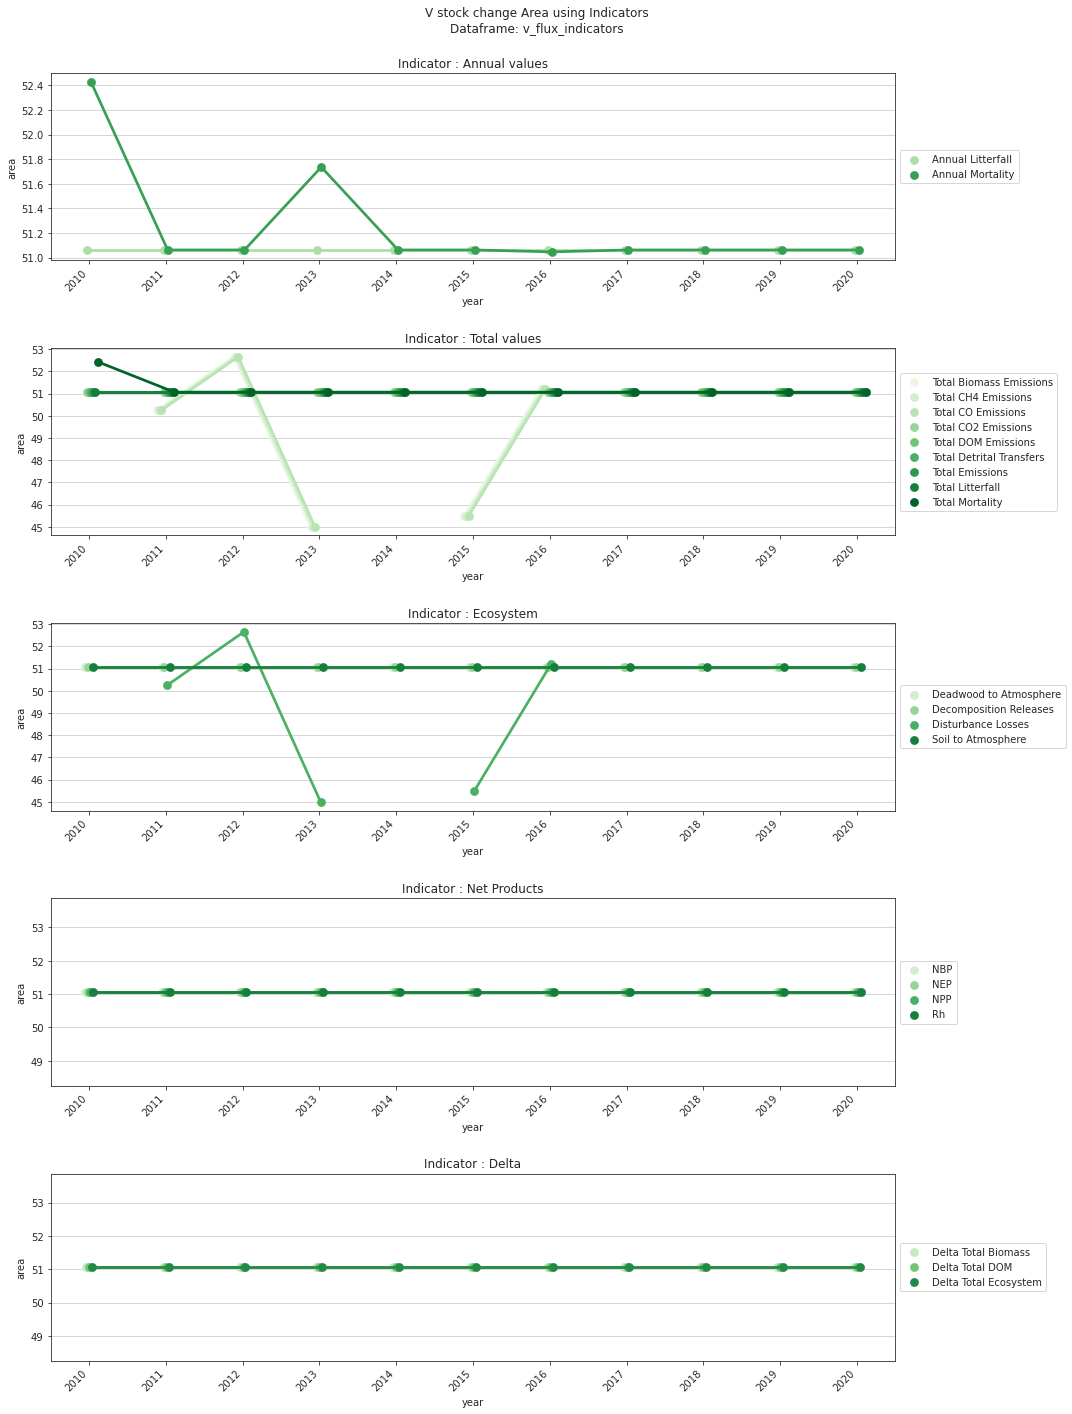

In [461]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='area', hue='indicator', size = 'disturbance_type', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Greens')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'V stock change Area using Indicators\nDataframe: {dataframes[8].name}\n')
plt.tight_layout()
plt.show()

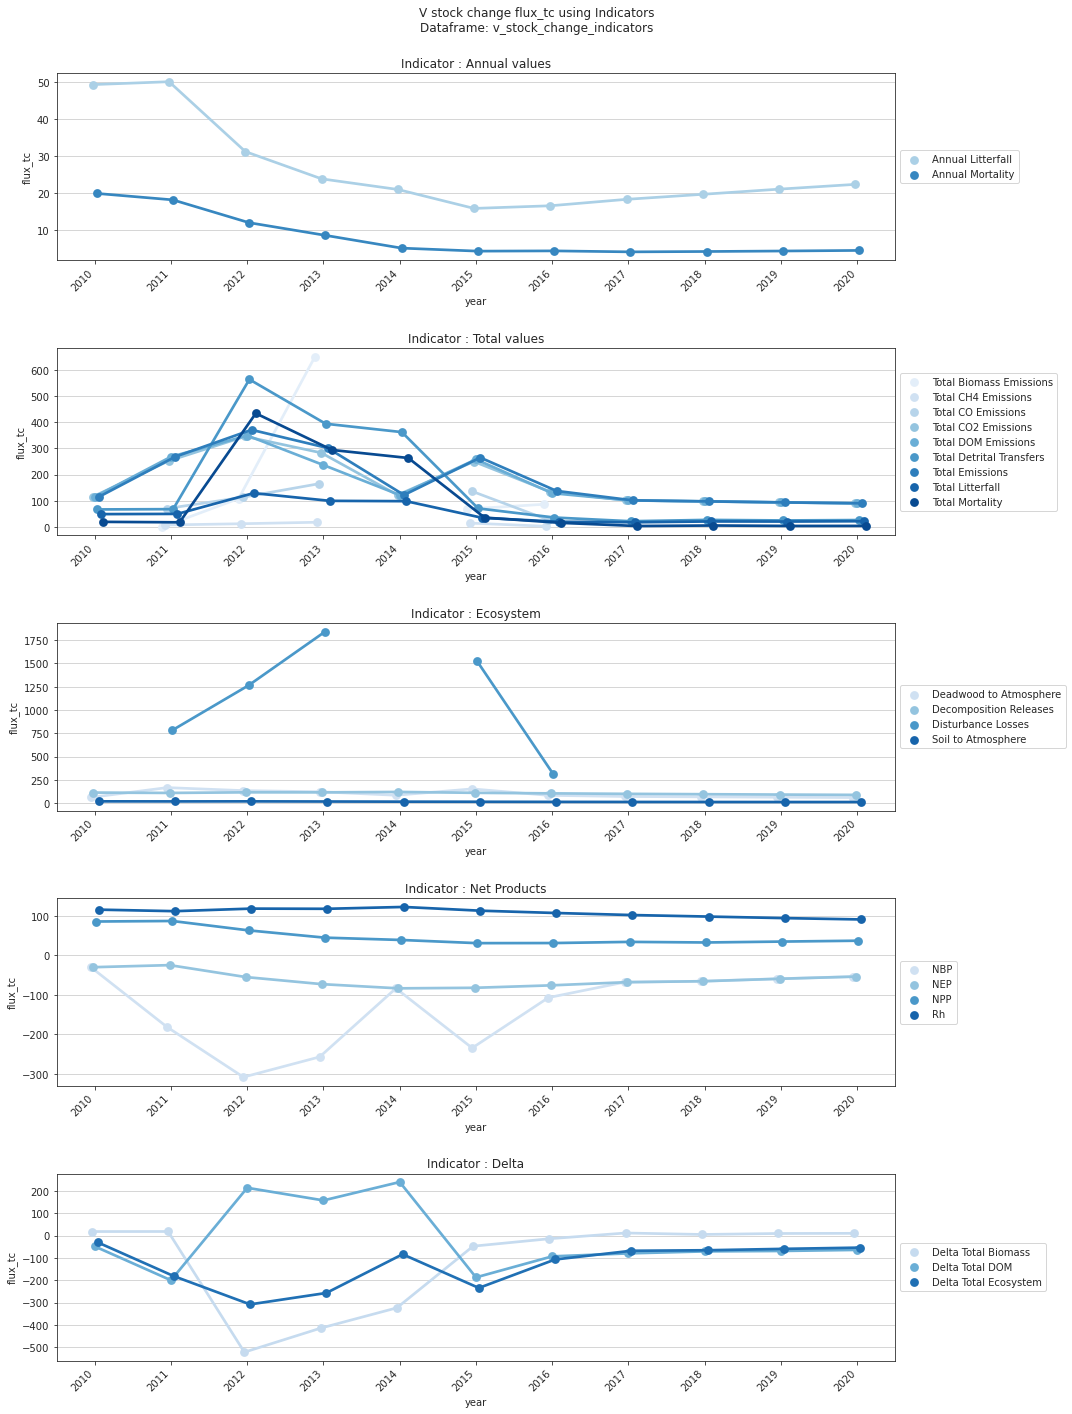

In [463]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='flux_tc', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Blues')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'V stock change flux_tc using Indicators\nDataframe: {dataframes[8].name}\n')
plt.tight_layout()
plt.show()

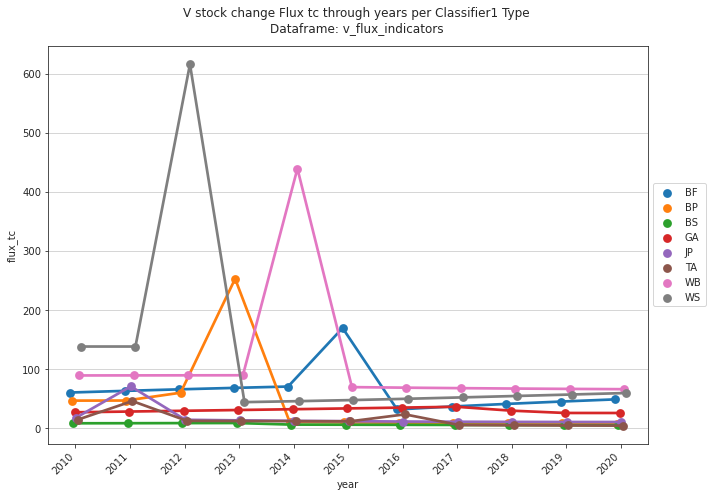

In [465]:
fig = plt.figure(figsize=(10, 7))
g = sns.pointplot(x='year', y='flux_tc', hue='Classifier1', data=df, dodge = True, ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f'V stock change Flux tc through years per Classifier1 Type\nDataframe: {dataframes[5].name}')
plt.tight_layout()
plt.show()

# Dataframe 9 - `'v_stock_change_indicators_density'`

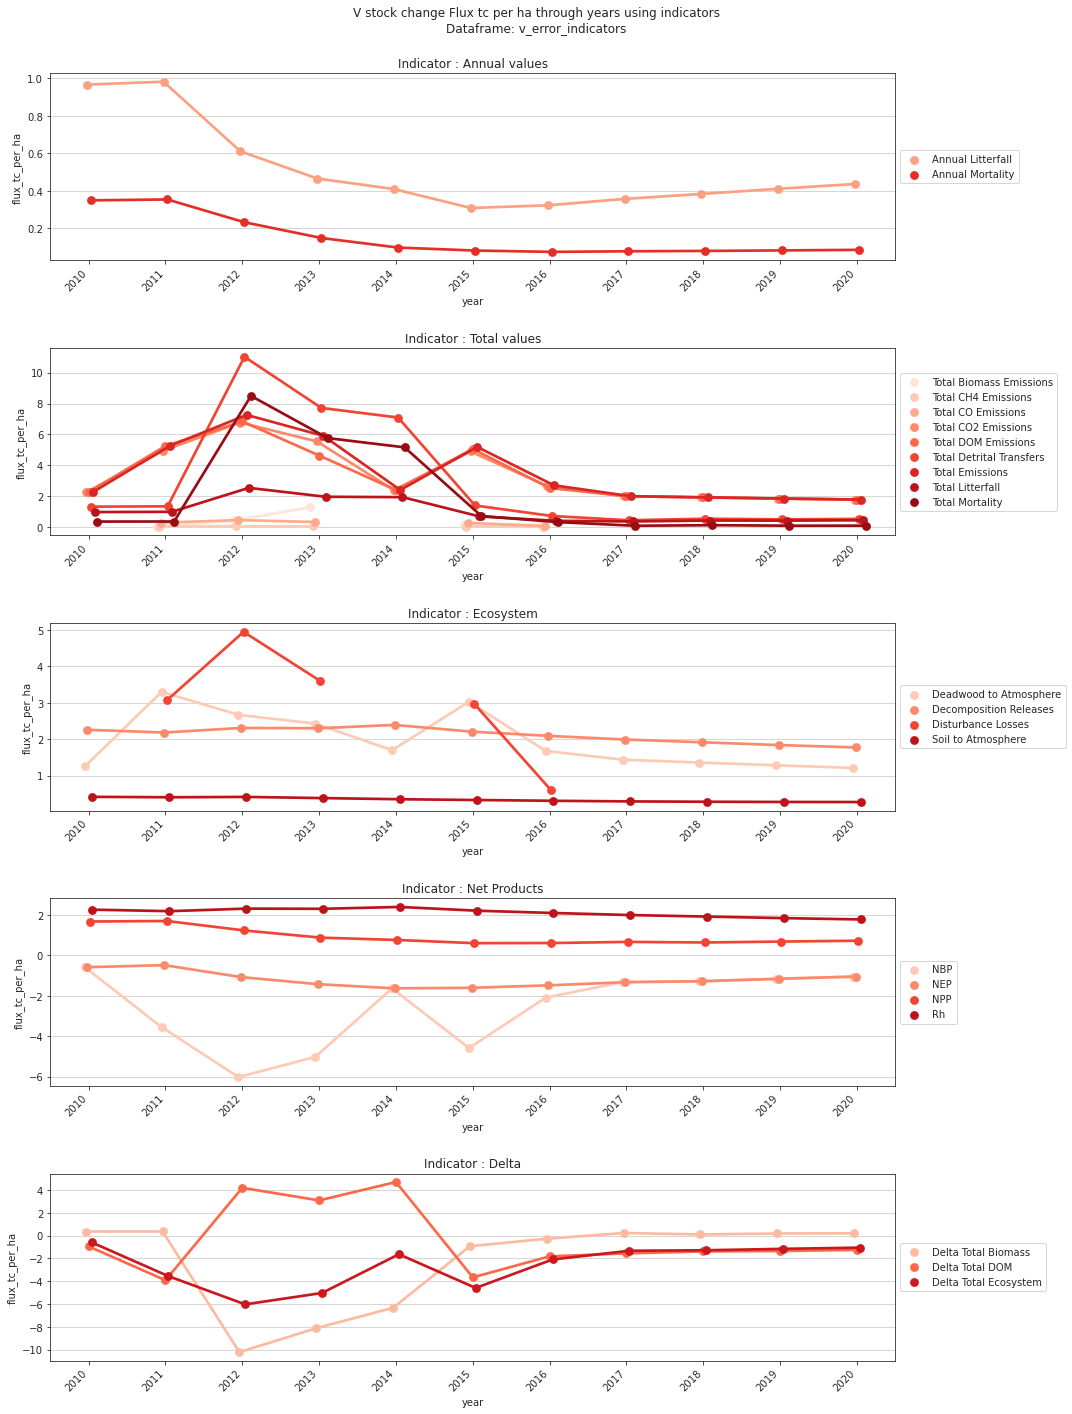

In [468]:
df = dataframes[9].copy()

fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='flux_tc_per_ha', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Reds')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'V stock change Flux tc per ha through years using indicators\nDataframe: {dataframes[2].name}\n')
plt.tight_layout()
plt.show()

# Dataframe 10 - `'v_total_disturbed_areas'`

In [473]:
df = dataframes[8].copy()
df.drop(columns=['Classifier2', 'unfccc_land_class'], inplace=True)
df

,indicator,Classifier1,year,age_range,area,flux_tc
0,Annual Litterfall,BF,2010,0-19,45.490321,60.695732
1,Annual Litterfall,BF,2011,0-19,45.490321,65.582917
2,Annual Litterfall,BF,2012,0-19,45.490321,70.080712
3,Annual Litterfall,BF,2013,0-19,45.490321,74.232167
4,Annual Litterfall,BF,2014,0-19,45.490321,78.073546
...,...,...,...,...,...,...
1999,Total Mortality,WS,2018,0-19,57.249622,1.631821
2000,Total Mortality,WS,2019,0-19,57.249622,2.224652
2001,Total Mortality,WS,2020,0-19,57.249622,2.894528
2002,Total Mortality,WS,2010,220-239,57.249622,64.340772


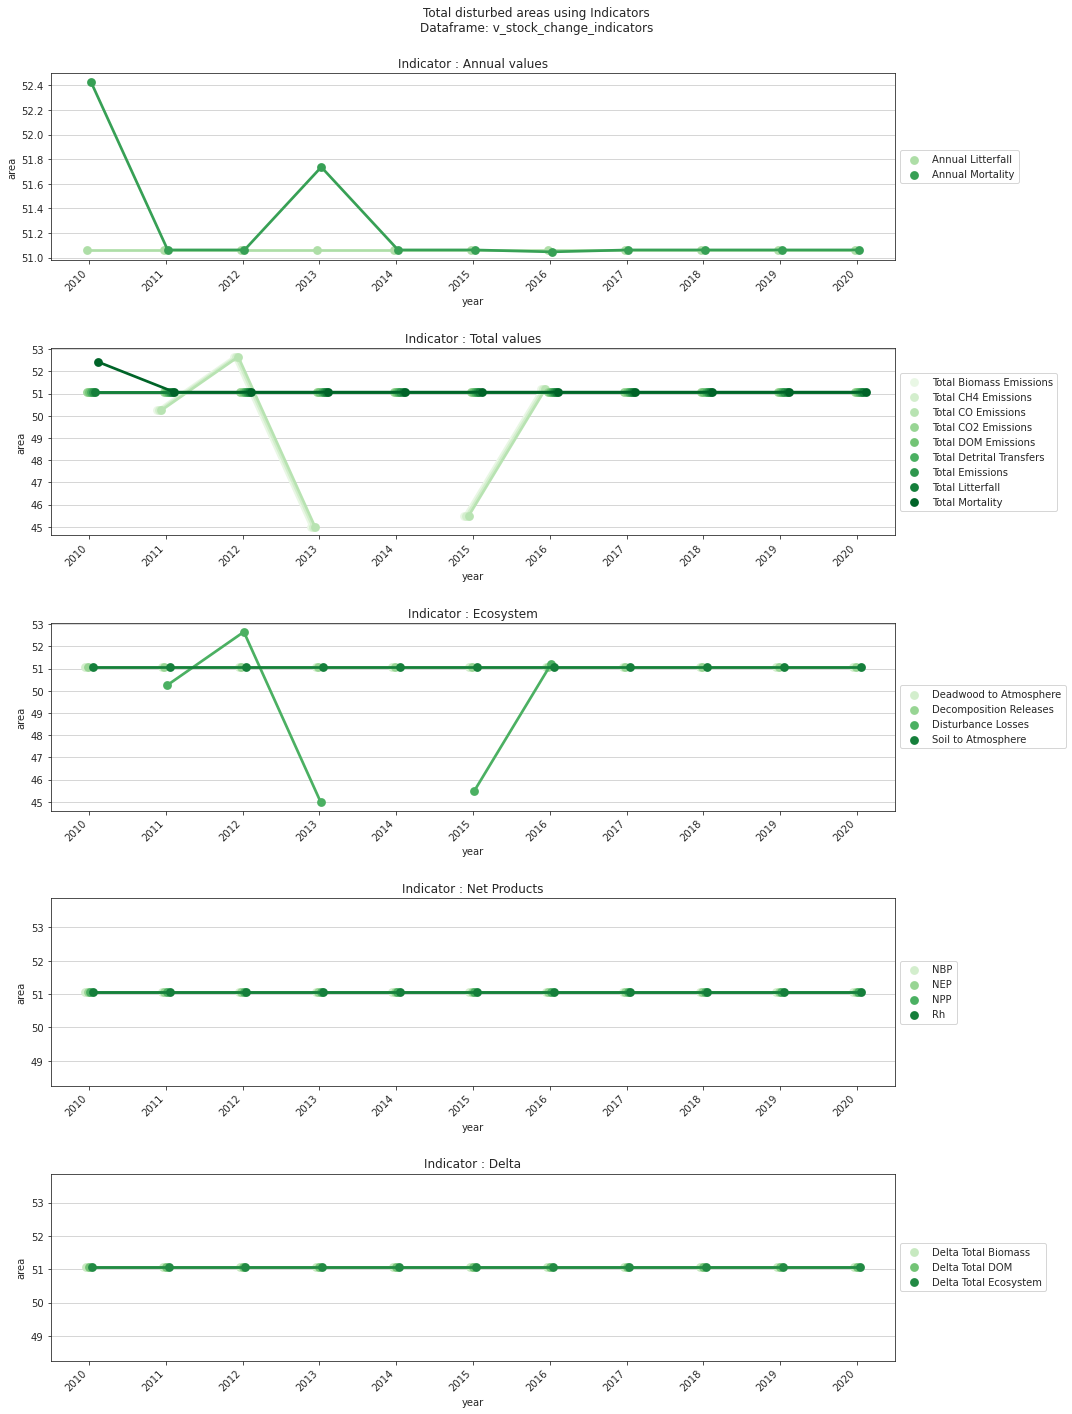

In [475]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='area', hue='indicator', size = 'disturbance_type', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Greens')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Total disturbed areas using Indicators\nDataframe: {dataframes[8].name}\n')
plt.tight_layout()
plt.show()

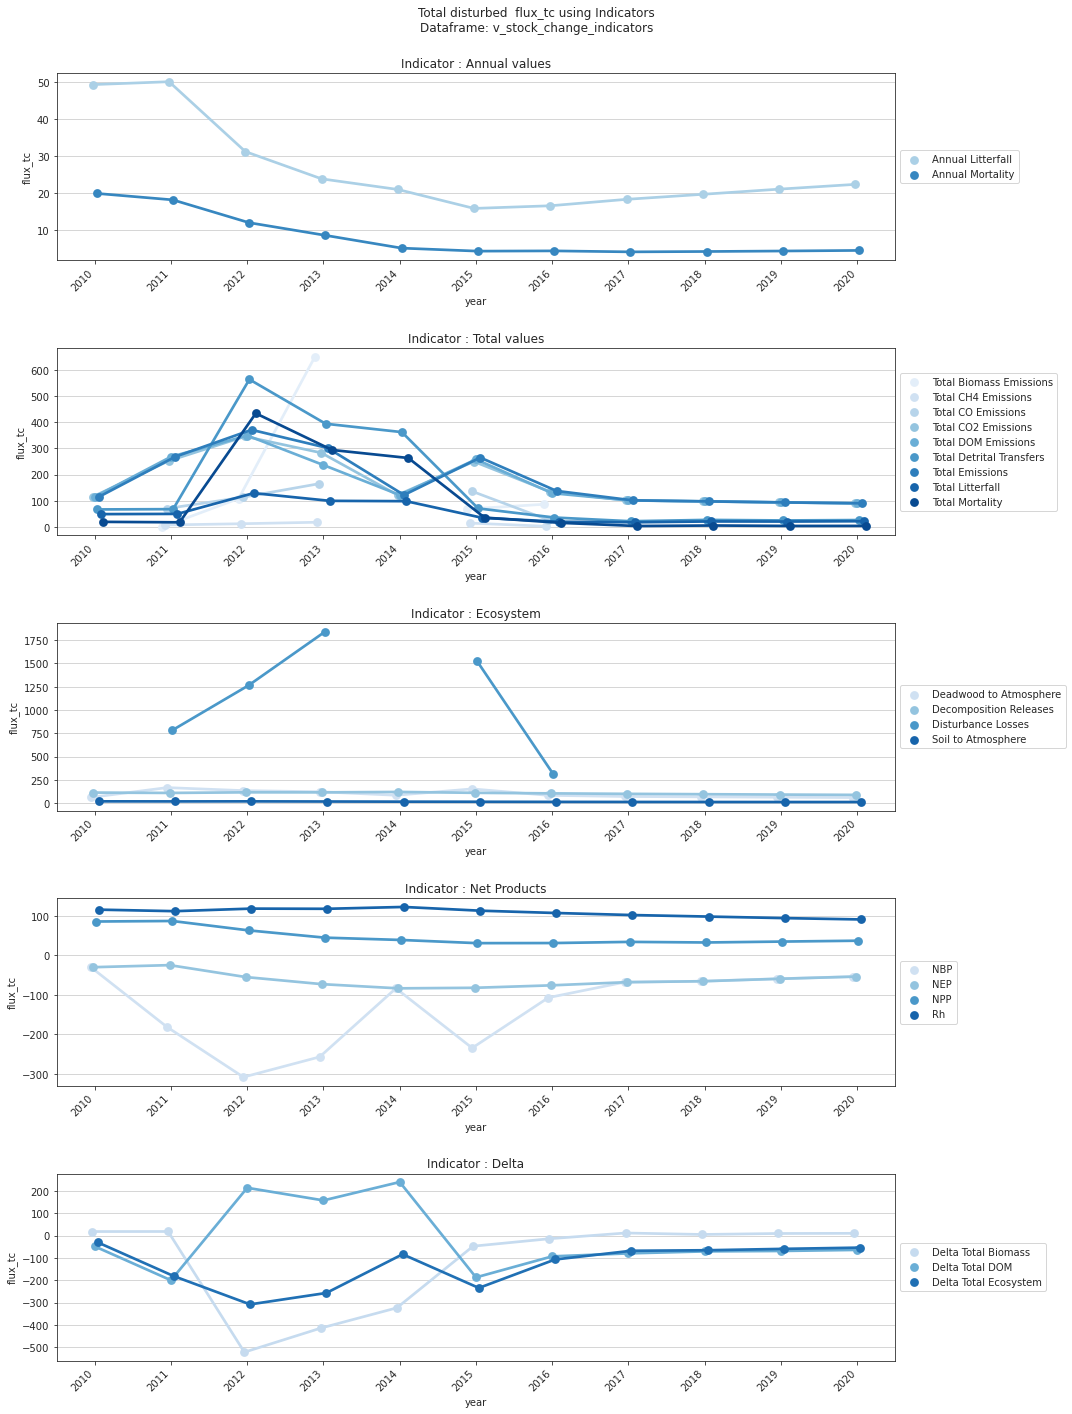

In [480]:
fig, axs = plt.subplots(nrows,1, figsize=(15,20), facecolor='w', edgecolor='k')

for ax, i in zip(axs.ravel(), indicators):
    name, list = i
    temp = df.loc[df['indicator'].isin(list),].copy()
    sns.pointplot(x='year', y='flux_tc', hue='indicator', data=temp, 
                  ci=None, dodge = True, ax=ax, palette='Blues')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'\nIndicator : {str(name)}')

fig.suptitle(f'Total disturbed  flux_tc using Indicators\nDataframe: {dataframes[8].name}\n')
plt.tight_layout()
plt.show()